![image.png](https://github.com/zey19/pi_intern_questions/blob/main/pear.png?raw=1)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/alpsina, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [106]:
# Your code here!
# We need to import necessary files

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [112]:
# First we need to read our dataset from github


url = 'https://raw.githubusercontent.com/zey19/pi_intern_questions/main/dataset.csv'
df = pd.read_csv(url)

df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False
1995,NaN,3.562990,NaN,2.499590,False
1996,4.059027,1.977436,2.144760,4.257220,False
1997,3.457310,3.962342,3.770837,3.243168,False


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


In [72]:
# Create the features dataset
X = df.drop('isVirus', axis=1)

# Create the labels dataset
y= df.loc[:,'isVirus']

In [54]:
y

0       False
1       False
2       False
3       False
4        True
        ...  
1994    False
1995    False
1996    False
1997    False
1998    False
Name: isVirus, Length: 1999, dtype: bool

In [55]:
#We need to convert our virus column in binary in order to make it easy

# Create an LabelEncoder object.
encoder = LabelEncoder()

# Convert string classes to integers using fit_transform() method
y= encoder.fit_transform(y)

In [56]:
y[:20]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

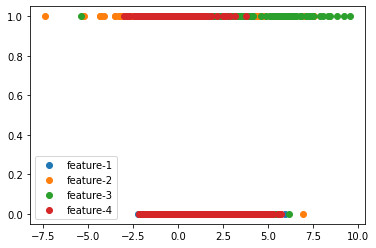

In [73]:
plt.scatter(X["feature_1"], y, label="feature-1")
plt.scatter(X["feature_2"], y, label="feature-2")
plt.scatter(X["feature_3"], y, label="feature-3")
plt.scatter(X["feature_4"], y, label="feature-4")
plt.legend()
plt.show()

In [58]:
# We have to make our data consistent for that we should clean the data

# names of the columns
columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    df[column] = df[column].fillna(0)

In [113]:
df = df.dropna(axis=0)
df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1991,5.153120,3.468305,3.112738,3.657268,False
1993,2.932724,1.681604,2.629296,2.054384,False
1994,2.532559,2.139847,3.859104,2.190373,False
1996,4.059027,1.977436,2.144760,4.257220,False


In [80]:
df.info()
# As we can see we cleaned our data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1622 non-null   float64
 1   feature_2  1622 non-null   float64
 2   feature_3  1622 non-null   float64
 3   feature_4  1622 non-null   float64
 4   isVirus    1622 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.9 KB


In [114]:
# Create the features dataset
X = df.drop('isVirus', axis=1)

# Create the labels dataset
y= df.loc[:,'isVirus']

#We need to convert our virus column in binary in order to make it easy

# Create an LabelEncoder object.
encoder = LabelEncoder()

# Convert string classes to integers using fit_transform() method
y= encoder.fit_transform(y)

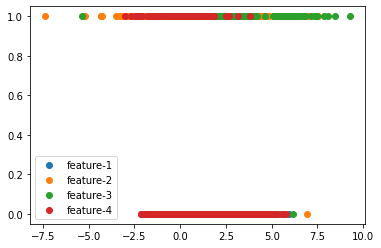

In [115]:
# Lets plot the cleaned data

plt.scatter(X["feature_1"], y, label="feature-1")
plt.scatter(X["feature_2"], y, label="feature-2")
plt.scatter(X["feature_3"], y, label="feature-3")
plt.scatter(X["feature_4"], y, label="feature-4")
plt.legend()
plt.show()

In [116]:
# Divide the dataset into train and test sets to evaulate our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [102]:
# Now we are ready to construct our machine learning model. Since we are making prediction about virus or not, this is a basic classification problem.
# In such kind of classification problems we can use tree based methods like Random Forest Classifier or Logistic Regression

# We can start with Logistic Regression and see it's performance
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [103]:
predictions = model.predict(X_test)

In [107]:
# Use score method to get accuracy of model
score = accuracy_score( y_test,predictions)
print(score)

0.6529850746268657


In [117]:
# We can try another method which is Random Forest

from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [118]:
predictionRandomForest=model.predict(X_test)

In [119]:
# Use score method to get accuracy of model
scoreRandomForest = accuracy_score(y_test,predictionRandomForest)
print(scoreRandomForest)

0.6529850746268657


## Results
As we see from above, both classification algortihms gave same result.

This 0.65 accuracy is not good enough and it seems model is not that much reliable.

To get higher accuracy we can make feature scaling or normalizing the data in order to get rid of data clutter.

Also we can try other algortihms lik SVM or Naive Bayes and compare the results.

